In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
loans = pd.read_csv('kiva_loans.csv')
#loans.head()
loans.columns


Index(['id', 'funded_amount', 'loan_amount', 'activity', 'sector', 'use',
       'country_code', 'country', 'region', 'currency', 'partner_id',
       'posted_time', 'disbursed_time', 'funded_time', 'term_in_months',
       'lender_count', 'tags', 'borrower_genders', 'repayment_interval',
       'date'],
      dtype='object')

In [0]:
lenders = pd.read_csv('lenders.csv')


getting rid of unnecessary columns, and cleaning the gender column for consistency

In [5]:
loans = loans.drop(['repayment_interval','date','use','id','tags', 
                  'funded_amount','term_in_months','partner_id',
                  'region','posted_time', 'disbursed_time', 'funded_time',],axis=1)
loans = loans.fillna('unknown')
loans.loc[loans['borrower_genders'].str.contains('emale'), 'borrower_genders'] = 'female'
loans.loc[loans['borrower_genders'].str.contains(', male'), 'borrower_genders'] = 'male'

loans.borrower_genders.value_counts()

female     90825
male       26531
unknown     1697
Name: borrower_genders, dtype: int64

In [0]:
loans.head()

In [0]:
lenders.columns

getting rid of remaining missing values and starting to filter data

In [0]:
lenders = lenders.drop(['permanent_name', 'display_name', 'city', 'state',
                 'member_since', 'occupation', 'loan_because',
                 'invited_by', 'num_invited'],axis=1)
lenders.rename(columns= {"country_code":"state"}, inplace=True)
lenders = lenders[pd.isnull(lenders['state']) == False]
lenders = lenders.groupby('state').filter(lambda x : len(x)>300)

In [0]:
print(lenders.shape)
print(lenders.state.value_counts())

In [0]:
themes = pd.read_csv('loan_themes_by_region.csv')

In [0]:
print(themes.shape)
print(themes.columns)

In [0]:
themes = themes.drop(['LocationName', 'geocode', 'names', 'geo', 'lat',
       'lon', 'mpi_region', 'mpi_geo', 'rural_pct','forkiva', 'region', 
                      'geocode_old', 'ISO','number','Partner ID', 
                      'Field Partner Name', 'sector', 'Loan Theme ID' ],axis=1)
themes.rename(columns= {'Loan Theme Type':"theme"}, inplace=True)
themes = themes.groupby('country').filter(lambda x : len(x)>130)

visualization of the countries that attract the most funding

In [9]:
amounts = themes.groupby('country').agg(sum)
amounts = amounts.sort_values(by=['amount'],ascending=False)
amounts

,amount
country,
Philippines,34315925
Kenya,19526800
Paraguay,19510150
Peru,18965275
El Salvador,13427925
Cambodia,13379100
Bolivia,11570850
Ecuador,9556750
Palestine,9421250


manually creating large categories to ease the analysis process

In [0]:
themes.loc[themes['theme'].str.contains('Mothers'), 'theme'] = 'Women'
themes.loc[themes['theme'].str.contains('Clean'), 'theme'] = 'Green'
themes.loc[themes['theme'].str.contains('Vulnerable'), 'theme'] = 'Underserved'
themes.loc[themes['theme'].str.contains('Chance'), 'theme'] = 'Underserved'
themes.loc[themes['theme'].str.contains('Finance'), 'theme'] = 'Finance'
themes.loc[themes['theme'].str.contains('bank'), 'theme'] = 'Finance'
themes.loc[themes['theme'].str.contains('Loan'), 'theme'] = 'Finance'
themes.loc[themes['theme'].str.contains('Youth'), 'theme'] = 'Youth'
themes.loc[themes['theme'].str.contains('Transactions'), 'theme'] = 'Finance'
themes.loc[themes['theme'].str.contains('Agriculture'), 'theme'] = 'Agriculture'
themes.loc[themes['theme'].str.contains('Mothers'), 'theme'] = 'Women'
themes.loc[themes['theme'].str.contains('Water'), 'theme'] = 'Water'
themes.loc[themes['theme'].str.contains('ducation'),'theme'] = 'Education'
themes.loc[themes['theme'].str.contains('Water'), 'theme'] = 'Water'
themes.loc[themes['theme'].str.contains('mothers'), 'theme'] = 'Women'
themes.loc[themes['theme'].str.contains('Underserved'), 'theme'] = 'Underserved'
themes.loc[themes['theme'].str.contains('Artisan'), 'theme'] = 'SME'
themes.loc[themes['theme'].str.contains('Bio'), 'theme'] = 'Green'
themes.loc[themes['theme'].str.contains('loan'), 'theme'] = 'Finance'
themes.loc[themes['theme'].str.contains('Sanitation'), 'theme'] = 'Water'
themes.loc[themes['theme'].str.contains('credit'), 'theme'] = 'Finance'
themes.loc[themes['theme'].str.contains('Solar'), 'theme'] = 'Green'
themes.loc[themes['theme'].str.contains('Small'), 'theme'] = 'SME'
themes.loc[themes['theme'].str.contains('gricultural'), 'theme'] = 'Agriculture'
themes.loc[themes['theme'].str.contains('Displaced'), 'theme'] = 'Housing'
themes.loc[themes['theme'].str.contains('Housing'), 'theme'] = 'Housing'
themes.loc[themes['theme'].str.contains('omen'), 'theme'] = 'Women'

#for i, row in themes[['theme']].iterrows():
 #   if ('Women' in themes.at[i,'theme']) == True : 
  #    themes.at[i,'theme'] = 'Women'

In [0]:
themes = themes.groupby('theme').filter(lambda x : len(x)>100)


scraping information about each country's wealth from wikipedia

In [0]:
import requests
from bs4 import BeautifulSoup


def urls(url):
  r = requests.get(url)
  r.content
  soup= BeautifulSoup(r.content, 'html.parser')
  return soup

In [0]:

url = 'https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(PPP)_per_capita'
  
soup = urls(url)
  
table=soup.find_all('table',{'class':'wikitable'})

rows=table[0].find_all('tr')
rows=[row.text.strip().split('\n') for row in rows]


In [0]:
def restr(x):
    if len(x)>4:
        x[3]=='\n'.join(x[3:])
        del x[4:]
    elif len(x)==3:
        x.append("")
    return x
rows=[restr(x) for x in rows]


In [0]:
df=pd.DataFrame([len(x) for x in rows])
df[0].value_counts()
colnames = rows[0]
data = rows[1:]

df = pd.DataFrame(data, columns=colnames)
df.rename(index=str, columns={'':'Country',
                                'Country/Territory':'GDP'}, inplace=True)

df1 = df.iloc[:,0:3]

In [0]:
df1.Country=[' '.join(i) for i in df1.Country.str.split()]
#\xa0 white space erased
# #df2['Country'] =[ i.replace('\xa0', '') for i in df2['Country']]


In [0]:
merged = df1.merge(amounts, left_on='Country', right_on='country', how='inner')
#merged = merged.drop(['Country'],axis=1)
merged = merged.sort_values('amount')

In [29]:
merged

,Rank,Country,GDP,amount
24,153,Lesotho,"3,494",430700
1,77,Costa Rica,"17,559",1140925
8,101,Georgia,"11,485",1501850
6,96,Indonesia,"13,230",2715975
21,143,Kyrgyzstan,"3,844",2866975
19,135,Honduras,"5,212",3040575
16,128,Ghana,"6,452",3116950
13,119,India,"7,874",3335175
17,131,Samoa,"5,890",4053200
26,162,Mali,"2,384",4231050


In [0]:
url2 = 'https://en.wikipedia.org/wiki/List_of_countries_and_dependencies_by_population'
  
soup2 = urls(url2)
  
table2=soup2.find_all('table',{'class':'wikitable'})
rows2=table2[0].find_all('tr')
rows2=[row.text.strip().split('\n') for row in rows2]

def essai(x):
    if len(x)>4:
        x[3]=='\n'.join(x[5:])
        del x[5:]
    elif len(x)==3:
        x.append("")
    return x

rows2=[essai(x) for x in rows2]

p=pd.DataFrame([len(x) for x in rows2])
p[0].value_counts()
colnames = rows2[0]
data = rows2[1:]
peeps = pd.DataFrame(data, columns=colnames)

In [0]:
pops = peeps.drop(['Rank', 'Date','Country(or dependent territory)'
       ],axis=1)
pops.rename(index=str, columns={'% of worldpopulation':'Population',
                               'Population':'Country' 
                             }, inplace=True)

In [0]:
import re
pops.Country = pops.Country.apply(lambda x : (re.split(r'\[',x)[0].strip()))

In [33]:
pops

,Country,Population
0,China,"1,398,230,000"
1,India,"1,349,750,000"
2,United States,"329,550,000"
3,Indonesia,"268,074,600"
4,Brazil,"210,172,000"
5,Pakistan,"205,337,000"
6,Nigeria,"200,963,599"
7,Bangladesh,"166,898,000"
8,Russia,"146,793,744"
9,Mexico,"126,577,691"


In [0]:
df3 = merged.merge(pops, left_on='Country', right_on='Country', how='inner')


In [0]:
df3.Population=df3.Population.str.replace(",","").astype(int)
df3.GDP=df3.GDP.str.replace(",","").astype(int)
df3.Rank=df3.Rank.astype(int)

testing various hypotheses and potential correlations

In [0]:
df3['Funding_p1000'] = df3.amount / df3.Population * 1000


In [0]:
countries = pd.DataFrame(themes.country.value_counts().reset_index())
countries.columns = ['countries', 'count']

df4 = df3.merge(countries, left_on='Country', right_on='countries', how='inner')

In [0]:
df4 = df4.drop(['countries'],axis=1)
df4['Avg_funding'] = round(df4.amount/df4['count'],0)
df4['Projects_p1MLN'] = round(df4['count']*1000000/df4.Population,1)


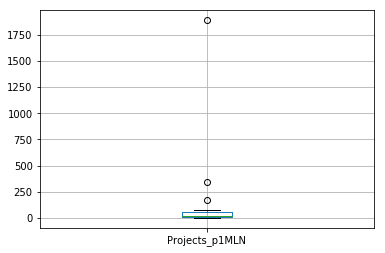

In [39]:
df4.boxplot(column='Projects_p1MLN')

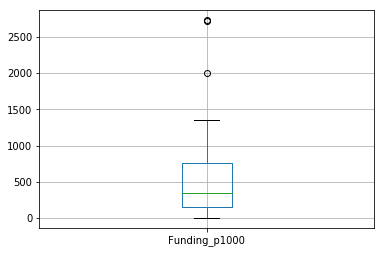

In [40]:

df4 = df4.loc[df4['Projects_p1MLN']!=df4['Projects_p1MLN'].max()]
df4.boxplot(column='Funding_p1000')

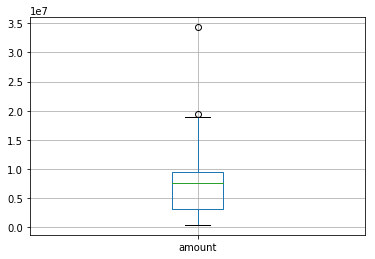

In [41]:

df4 = df4.loc[df4['Funding_p1000']!=df4['Funding_p1000'].max()]

df4.boxplot(column='amount')


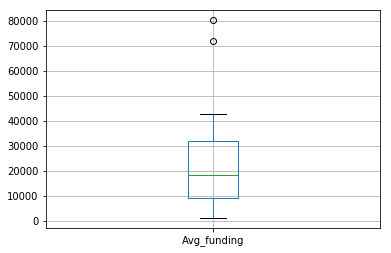

In [42]:
df4 = df4.loc[df4['amount']!=df4['amount'].max()]
df4.boxplot(column='Avg_funding')


In [43]:
df8 = df4.loc[df4['Avg_funding']!=df4['Avg_funding'].max()]


# number of projects per country for 1 million people

df8.head()

,Rank,Country,GDP,amount,Population,Funding_p1000,count,Avg_funding,Projects_p1MLN
0,153,Lesotho,3494,430700,2007201,214.577414,336,1282.0,167.4
1,77,Costa Rica,17559,1140925,5058007,225.568094,143,7978.0,28.3
2,101,Georgia,11485,1501850,3723500,403.343628,296,5074.0,79.5
3,96,Indonesia,13230,2715975,268074600,10.131415,195,13928.0,0.7
4,143,Kyrgyzstan,3844,2866975,6389500,448.700994,408,7027.0,63.9


visualizing potential correlations

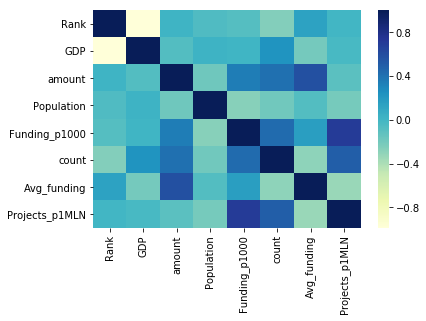

In [44]:
sns.heatmap(df8.corr(), cmap='YlGnBu')


In [45]:
df8.corr()

,Rank,GDP,amount,Population,Funding_p1000,count,Avg_funding,Projects_p1MLN
Rank,1.000000,-0.986018,0.016628,-0.053455,-0.075454,-0.254332,0.143750,0.000194
GDP,-0.986018,1.000000,-0.063240,0.025930,0.012343,0.237345,-0.195627,-0.022583
amount,0.016628,-0.063240,1.000000,-0.174269,0.354270,0.417715,0.585970,-0.099705
Population,-0.053455,0.025930,-0.174269,1.000000,-0.271147,-0.181187,-0.069694,-0.204194
Funding_p1000,-0.075454,0.012343,0.354270,-0.271147,1.000000,0.437628,0.162872,0.711295
count,-0.254332,0.237345,0.417715,-0.181187,0.437628,1.000000,-0.289152,0.502098
Avg_funding,0.143750,-0.195627,0.585970,-0.069694,0.162872,-0.289152,1.000000,-0.327703
Projects_p1MLN,0.000194,-0.022583,-0.099705,-0.204194,0.711295,0.502098,-0.327703,1.000000


visualization plots with zooms

(0, 21000000)

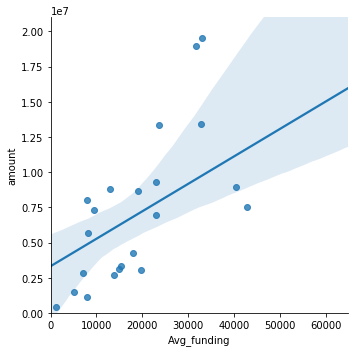

In [46]:
sns.lmplot('Avg_funding','amount',data=df8)
plt.xlim(0, 65000)

plt.ylim(0, 21000000)

(0, 21000000)

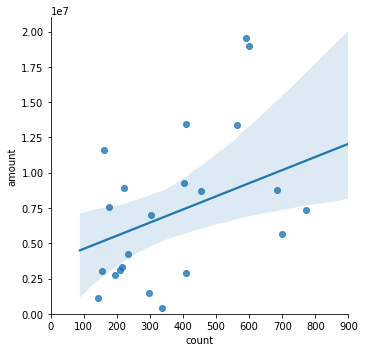

In [47]:
sns.lmplot('count','amount',data=df8)
plt.xlim(0, 900)
plt.ylim(0, 21000000)

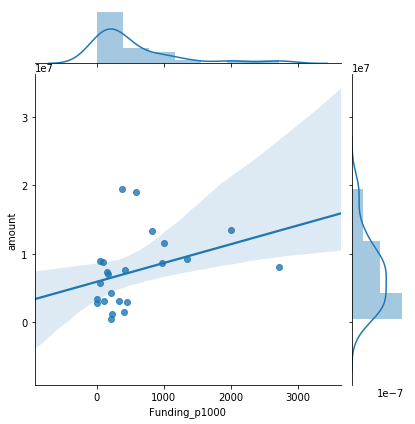

In [48]:
sns.jointplot(y='amount',x='Funding_p1000',data=df8, kind='reg')

In [49]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
X=df8.assign(const=1)
X = X.drop(['Country'], axis=1)
pd.Series([vif(X.values,i) for i in range(X.shape[1])],index=X.columns)

Rank                50.961655
GDP                 50.715651
amount               4.989155
Population           1.223042
Funding_p1000        4.296321
count                4.268817
Avg_funding          3.662112
Projects_p1MLN       4.974557
const             1984.640737
dtype: float64

In [0]:
import statsmodels.formula.api as smf

def get_vif(exogs,data):
    vif_array=np.array([])
    tolerance_array=np.array([])
    
    for exog in exogs:
        not_exog=[i for i in exogs if i!=exog]
        formula=f"{exog} ~ {' + '.join(not_exog)}"
        
        r_squared=smf.ols(formula,data=data).fit().rsquared
        
        vif=1/(1-r_squared)
        vif_array=np.append(vif_array,vif).round(2)
        
        tolerance=1-r_squared
        tolerance_array=np.append(tolerance_array,tolerance).round(2)
    df_vif=pd.DataFrame({'VIF':vif_array,'Tolerance':tolerance_array},index=exogs)
    
    return df_vif

In [51]:
import numpy as np
df9 = df8.drop(['Country'], axis=1)
df9 = df9.drop(['Rank'], axis=1)
get_vif(exogs=df9.columns,data=df8)

,VIF,Tolerance
GDP,1.26,0.80
amount,4.97,0.20
Population,1.09,0.91
Funding_p1000,3.98,0.25
count,4.23,0.24
Avg_funding,3.53,0.28
Projects_p1MLN,4.95,0.20


In [52]:
df9=(df9-df9.mean())/df9.std()
df9.shape

(23, 7)

unsuccessful regression model

In [53]:

results = smf.ols(' Avg_funding ~ Projects_p1MLN+amount', data=df9).fit()

# Inspect the results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            Avg_funding   R-squared:                       0.417
Model:                            OLS   Adj. R-squared:                  0.358
Method:                 Least Squares   F-statistic:                     7.141
Date:                Thu, 18 Jul 2019   Prob (F-statistic):            0.00457
Time:                        10:30:51   Log-Likelihood:                -25.927
No. Observations:                  23   AIC:                             57.85
Df Residuals:                      20   BIC:                             61.26
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept      -8.327e-17      0.167  -4.98e

In [54]:
loans.head()

,loan_amount,activity,sector,country_code,country,currency,lender_count,borrower_genders
0,300.0,Fruits & Vegetables,Food,PK,Pakistan,PKR,12,female
1,575.0,Rickshaw,Transportation,PK,Pakistan,PKR,14,female
2,150.0,Transportation,Transportation,IN,India,INR,6,female
3,200.0,Embroidery,Arts,PK,Pakistan,PKR,8,female
4,400.0,Milk Sales,Food,PK,Pakistan,PKR,16,female


In [61]:
loans2 = loans.loc[loans['borrower_genders']!='unknown']
loans2['lender_count']=pd.to_numeric(loans2.lender_count)
loans2.dtypes


loan_amount         float64
activity             object
sector               object
country_code         object
country              object
currency             object
lender_count        float64
borrower_genders     object
dtype: object

In [62]:
amounts_pG = loans2.groupby(['country','borrower_genders']).agg(sum)
amounts_pG = amounts_pG.reset_index()

#amounts_pG=amounts_pG.drop(['activity', 'sector', 'country_code', 'currency'],axis=1)
amounts_pG

,country,borrower_genders,loan_amount,lender_count
0,Albania,female,319275.0,10998.0
1,Albania,male,267150.0,9041.0
2,Armenia,female,1918525.0,52478.0
3,Armenia,male,443000.0,12471.0
4,Azerbaijan,female,474525.0,14356.0
5,Azerbaijan,male,706800.0,19015.0
6,Belize,female,10125.0,380.0
7,Belize,male,70725.0,2577.0
8,Benin,female,452100.0,13235.0
9,Benin,male,16850.0,526.0


In [63]:
amounts_pG['isFemale']=[1 if i == 'female' else 0 for i in amounts_pG.borrower_genders]
amounts_pG['Avg_funding'] = round(amounts_pG.loan_amount/amounts_pG['lender_count'],0)
amounts_pG = amounts_pG.sort_values('lender_count' )
amounts_pG = amounts_pG.loc[amounts_pG['lender_count']>1000]

amounts_pG.head()


,country,borrower_genders,loan_amount,lender_count,isFemale,Avg_funding
84,Nigeria,female,33950.0,1198.0,1,28.0
136,Zambia,female,34350.0,1238.0,1,28.0
21,Cameroon,male,37375.0,1283.0,0,29.0
106,Somalia,female,48600.0,1288.0,1,38.0
116,Thailand,female,36100.0,1351.0,1,27.0


In [0]:
amounts_pG = amounts_pG.drop(['country'],axis=1)
amounts_pG = amounts_pG.drop(['borrower_genders'],axis=1)


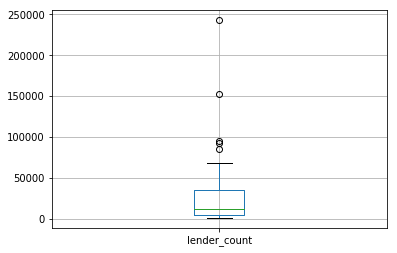

In [65]:
amounts_pG.boxplot(column='lender_count')

In [0]:
amounts_pG = amounts_pG.loc[amounts_pG['lender_count']!=0]
amounts_pG = amounts_pG.loc[amounts_pG['Avg_funding']<50]
amounts_pG = amounts_pG.loc[amounts_pG['loan_amount']<9000000]
amounts_pG = amounts_pG.loc[amounts_pG['lender_count']<500000]

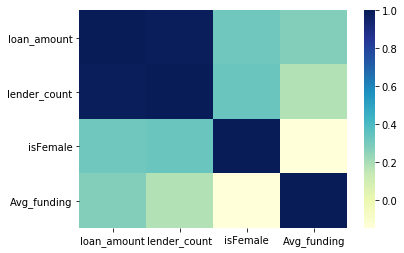

In [68]:
sns.heatmap(amounts_pG.corr(), cmap='YlGnBu')

In [69]:
from scipy.stats import kstest

for i in amounts_pG:
    print(kstest(amounts_pG[i],'norm'))

KstestResult(statistic=1.0, pvalue=0.0)
KstestResult(statistic=1.0, pvalue=0.0)
KstestResult(statistic=0.5, pvalue=5.917791553493453e-26)
KstestResult(statistic=1.0, pvalue=0.0)


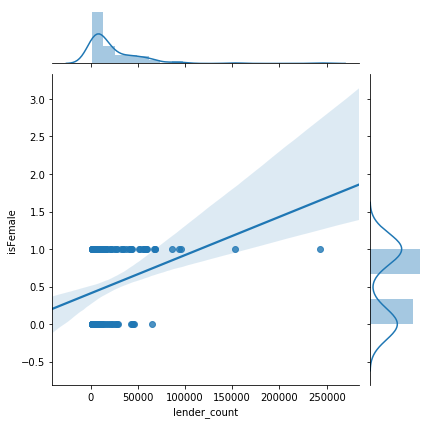

In [70]:
sns.jointplot(y='isFemale',x='lender_count',data=amounts_pG, kind='reg')

(0, 50000)

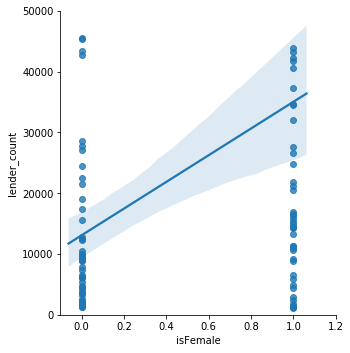

In [71]:
sns.lmplot('isFemale','lender_count',data=amounts_pG)
plt.xlim(-0.1, 1.2)
plt.ylim(0, 50000)

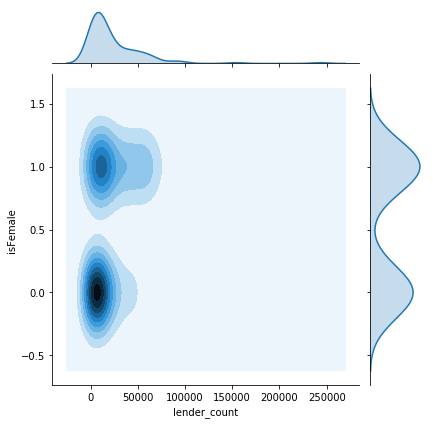

In [72]:
sns.jointplot('lender_count','isFemale', data = amounts_pG, kind = 'kde')

In [73]:
print('Maximum value for lender_count',amounts_pG.lender_count.max())
print(" ")
print('Last value for lender_count',amounts_pG.lender_count.iloc[-1])
print(" ")
print('Mean value for lender_count',round(amounts_pG.lender_count.mean(),0))
print(" ")
cnt = 20000
isf = 1

Maximum value for lender_count 242710.0
 
Last value for lender_count 242710.0
 
Mean value for lender_count 24862.0
 


In [74]:
X=[1,isf,np.log(cnt)]
results.params

print('Predicted with matrix multiplication ',np.dot(X,results.params))

Predicted with matrix multiplication  5.2626030981915894
